# Hardhat and Safety Vest Detection with YOLO v6
Surveillance system for safety measurements in construction sites. 
The system will detect the presence of Safety Vests and Hardhats.

<img src='imgs/infer2.jpeg' width='50%'>

## Dependencies Installation
<img src='https://pjreddie.com/media/image/yologo_2.png' width='25%'>
The model was trained using YOLOv6. 
All steps were documented at YOLOv6 Github <a href='https://github.com/meituan/YOLOv6/blob/main/docs/Train_custom_data.md'>Docs</a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Clone the repo
! git clone https://github.com/meituan/YOLOv6

Cloning into 'YOLOv6'...
remote: Enumerating objects: 1864, done.
remote: Counting objects: 100% (871/871), done.
remote: Compressing objects: 100% (262/262), done.
remote: Total 1864 (delta 656), reused 726 (delta 606), pack-reused 993
Receiving objects: 100% (1864/1864), 20.60 MiB | 9.11 MiB/s, done.
Resolving deltas: 100% (1028/1028), done.


In [ ]:
%cd YOLOv6
! ls

/content/YOLOv6
assets	 data	 docs		  LICENSE    requirements.txt  turtorial.ipynb
configs  deploy  inference.ipynb  README.md  tools	       yolov6


In [ ]:
# Install requirements
! pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.6 MB/s 
     |████████████████████████████████| 2.0 MB 49.9 MB/s 
ERROR: Could not find a version that satisfies the requirement pytorch_quantization>=2.1.1 (from versions: 0.0.1.dev4, 0.0.1.dev5)
ERROR: No matching distribution found for pytorch_quantization>=2.1.1


## Loading and Extracting Dataset
The used dataset is available publicly on <a href='https://www.kaggle.com/datasets/johnsyin97/hardhat-and-safety-vest-image-for-object-detection'>Kaggle</a>

It contains two calsses:
* Hardhat
* Safety Vest

Labels are in `txt` format which is the required format for YOLO

In [ ]:
! mkdir custom_data

In [ ]:
# Copy data to YOLO root directory
! cp '/content/drive/MyDrive/Projects/YOLOv6-Hardhat-Safety-Vest-Detection/custom_data.zip' '/content/YOLOv6/custom_data'

In [ ]:
# unzip archive
! unzip '/content/YOLOv6/custom_data/custom_data.zip'

Streaming output truncated to the last 5000 lines.
  inflating: custom_data/labels/train/pos_1868.txt  
  inflating: __MACOSX/custom_data/labels/train/._pos_1868.txt  
  inflating: custom_data/labels/train/neg_875.txt  
  inflating: __MACOSX/custom_data/labels/train/._neg_875.txt  
  inflating: custom_data/labels/train/pos_1688.txt  
  inflating: __MACOSX/custom_data/labels/train/._pos_1688.txt  
  inflating: custom_data/labels/train/neg_695.txt  
  inflating: __MACOSX/custom_data/labels/train/._neg_695.txt  
  inflating: custom_data/labels/train/pos_1850.txt  
  inflating: __MACOSX/custom_data/labels/train/._pos_1850.txt  
  inflating: custom_data/labels/train/pos_669.txt  
  inflating: __MACOSX/custom_data/labels/train/._pos_669.txt  
  inflating: custom_data/labels/train/neg_681.txt  
  inflating: __MACOSX/custom_data/labels/train/._neg_681.txt  
  inflating: custom_data/labels/train/pos_1844.txt  
  inflating: __MACOSX/custom_data/labels/train/._pos_1844.txt  
  inflating: custom_d

In [ ]:
# Copy YAML file from drive to YOLO dir
! cp '/content/drive/MyDrive/Projects/YOLOv6-Hardhat-Safety-Vest-Detection/custom_dataset.yaml' '/content/YOLOv6/custom_data'

In [ ]:
# Display YAML file content
! cat '/content/YOLOv6/custom_data/custom_dataset.yaml'

# Please insure that your custom_dataset are put in same parent dir with YOLOv6_DIR
train: custom_data/images/train # train images
val: custom_data/images/val # val images
# test: ../custom_dataset/images/test # test images (optional)

# whether it is coco dataset, only coco dataset should be set to True.
is_coco: False

# Classes
nc: 2  # number of classes
names: ['Hardhat', 'Safety Vest']  # class names

## Reading Config File

In [ ]:
# Display tiny config file
! cat '/content/YOLOv6/configs/yolov6t_finetune.py'

# YOLOv6t model
model = dict(
    type='YOLOv6t',
    pretrained='weights/yolov6t.pt',
    depth_multiple=0.33,
    width_multiple=0.375,
    backbone=dict(
        type='EfficientRep',
        num_repeats=[1, 6, 12, 18, 6],
        out_channels=[64, 128, 256, 512, 1024],
        ),
    neck=dict(
        type='RepPANNeck',
        num_repeats=[12, 12, 12, 12],
        out_channels=[256, 128, 128, 256, 256, 512],
        ),
    head=dict(
        type='EffiDeHead',
        in_channels=[128, 256, 512],
        num_layers=3,
        begin_indices=24,
        anchors=1,
        out_indices=[17, 20, 23],
        strides=[8, 16, 32],
        iou_type='siou',
        use_dfl=False,
        reg_max=0 #if use_dfl is False, please set reg_max to 0
    )
)

solver = dict(
    optim='SGD',
    lr_scheduler='Cosine',
    lr0=0.0032,
    lrf=0.12,
    momentum=0.843,
    weight_decay=0.00036,
    warmup_epochs=2.0,
    warmup_momentum=0.5,
    warmup_bias_lr=0.05
)

data_aug = dict(
    hsv_h=0.013

## Train

In [ ]:
! python tools/train.py --batch 64 --epochs 50 --conf configs/yolov6t_finetune.py --data custom_data/custom_dataset.yaml --device 0

Using 1 GPU for training... 
training args are: Namespace(batch_size=64, calib=False, check_images=False, check_labels=False, conf_file='configs/yolov6t_finetune.py', data_path='custom_data/custom_dataset.yaml', device='0', dist_url='env://', distill=False, distill_feat=False, epochs=50, eval_final_only=False, eval_interval=20, gpu_count=0, heavy_eval_range=50, img_size=640, local_rank=-1, name='exp', output_dir='./runs/train', quant=False, rank=-1, resume=False, save_ckpt_on_last_n_epoch=-1, save_dir='runs/train/exp1', stop_aug_last_n_epoch=15, teacher_model_path=None, temperature=20, workers=8, world_size=1, write_trainbatch_tb=False)

Train: Final numbers of valid images: 2799/ labels: 2799. 
0.1s for dataset initialization.
Convert to COCO format
100% 742/742 [00:00<00:00, 126101.04it/s]
Convert to COCO format finished. Resutls saved in custom_data/annotations/instances_val.json
Val: Final numbers of valid images: 742/ labels: 742. 
0.1s for dataset initialization.
Loading state_di

## Evaluate

In [ ]:
! python tools/eval.py --data custom_data/custom_dataset.yaml  --weights runs/train/exp1/weights/best_ckpt.pt --device 0

Namespace(batch_size=32, conf_thres=0.03, data='custom_data/custom_dataset.yaml', device='0', do_coco_metric=True, do_pr_metric=True, eval_config_file='./configs/experiment/eval_640_repro.py', force_no_pad=False, half=False, img_size=640, iou_thres=0.65, letterbox_return_int=False, name='exp', not_infer_on_rect=False, plot_confusion_matrix=False, plot_curve=True, reproduce_640_eval=False, save_dir='runs/val/', scale_exact=False, task='val', test_load_size=640, verbose=False, weights='runs/train/exp1/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp1/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
Model Summary: Params: 9.67M, Gflops: 24.82
Val: 

In [ ]:
from IPython.display import Image

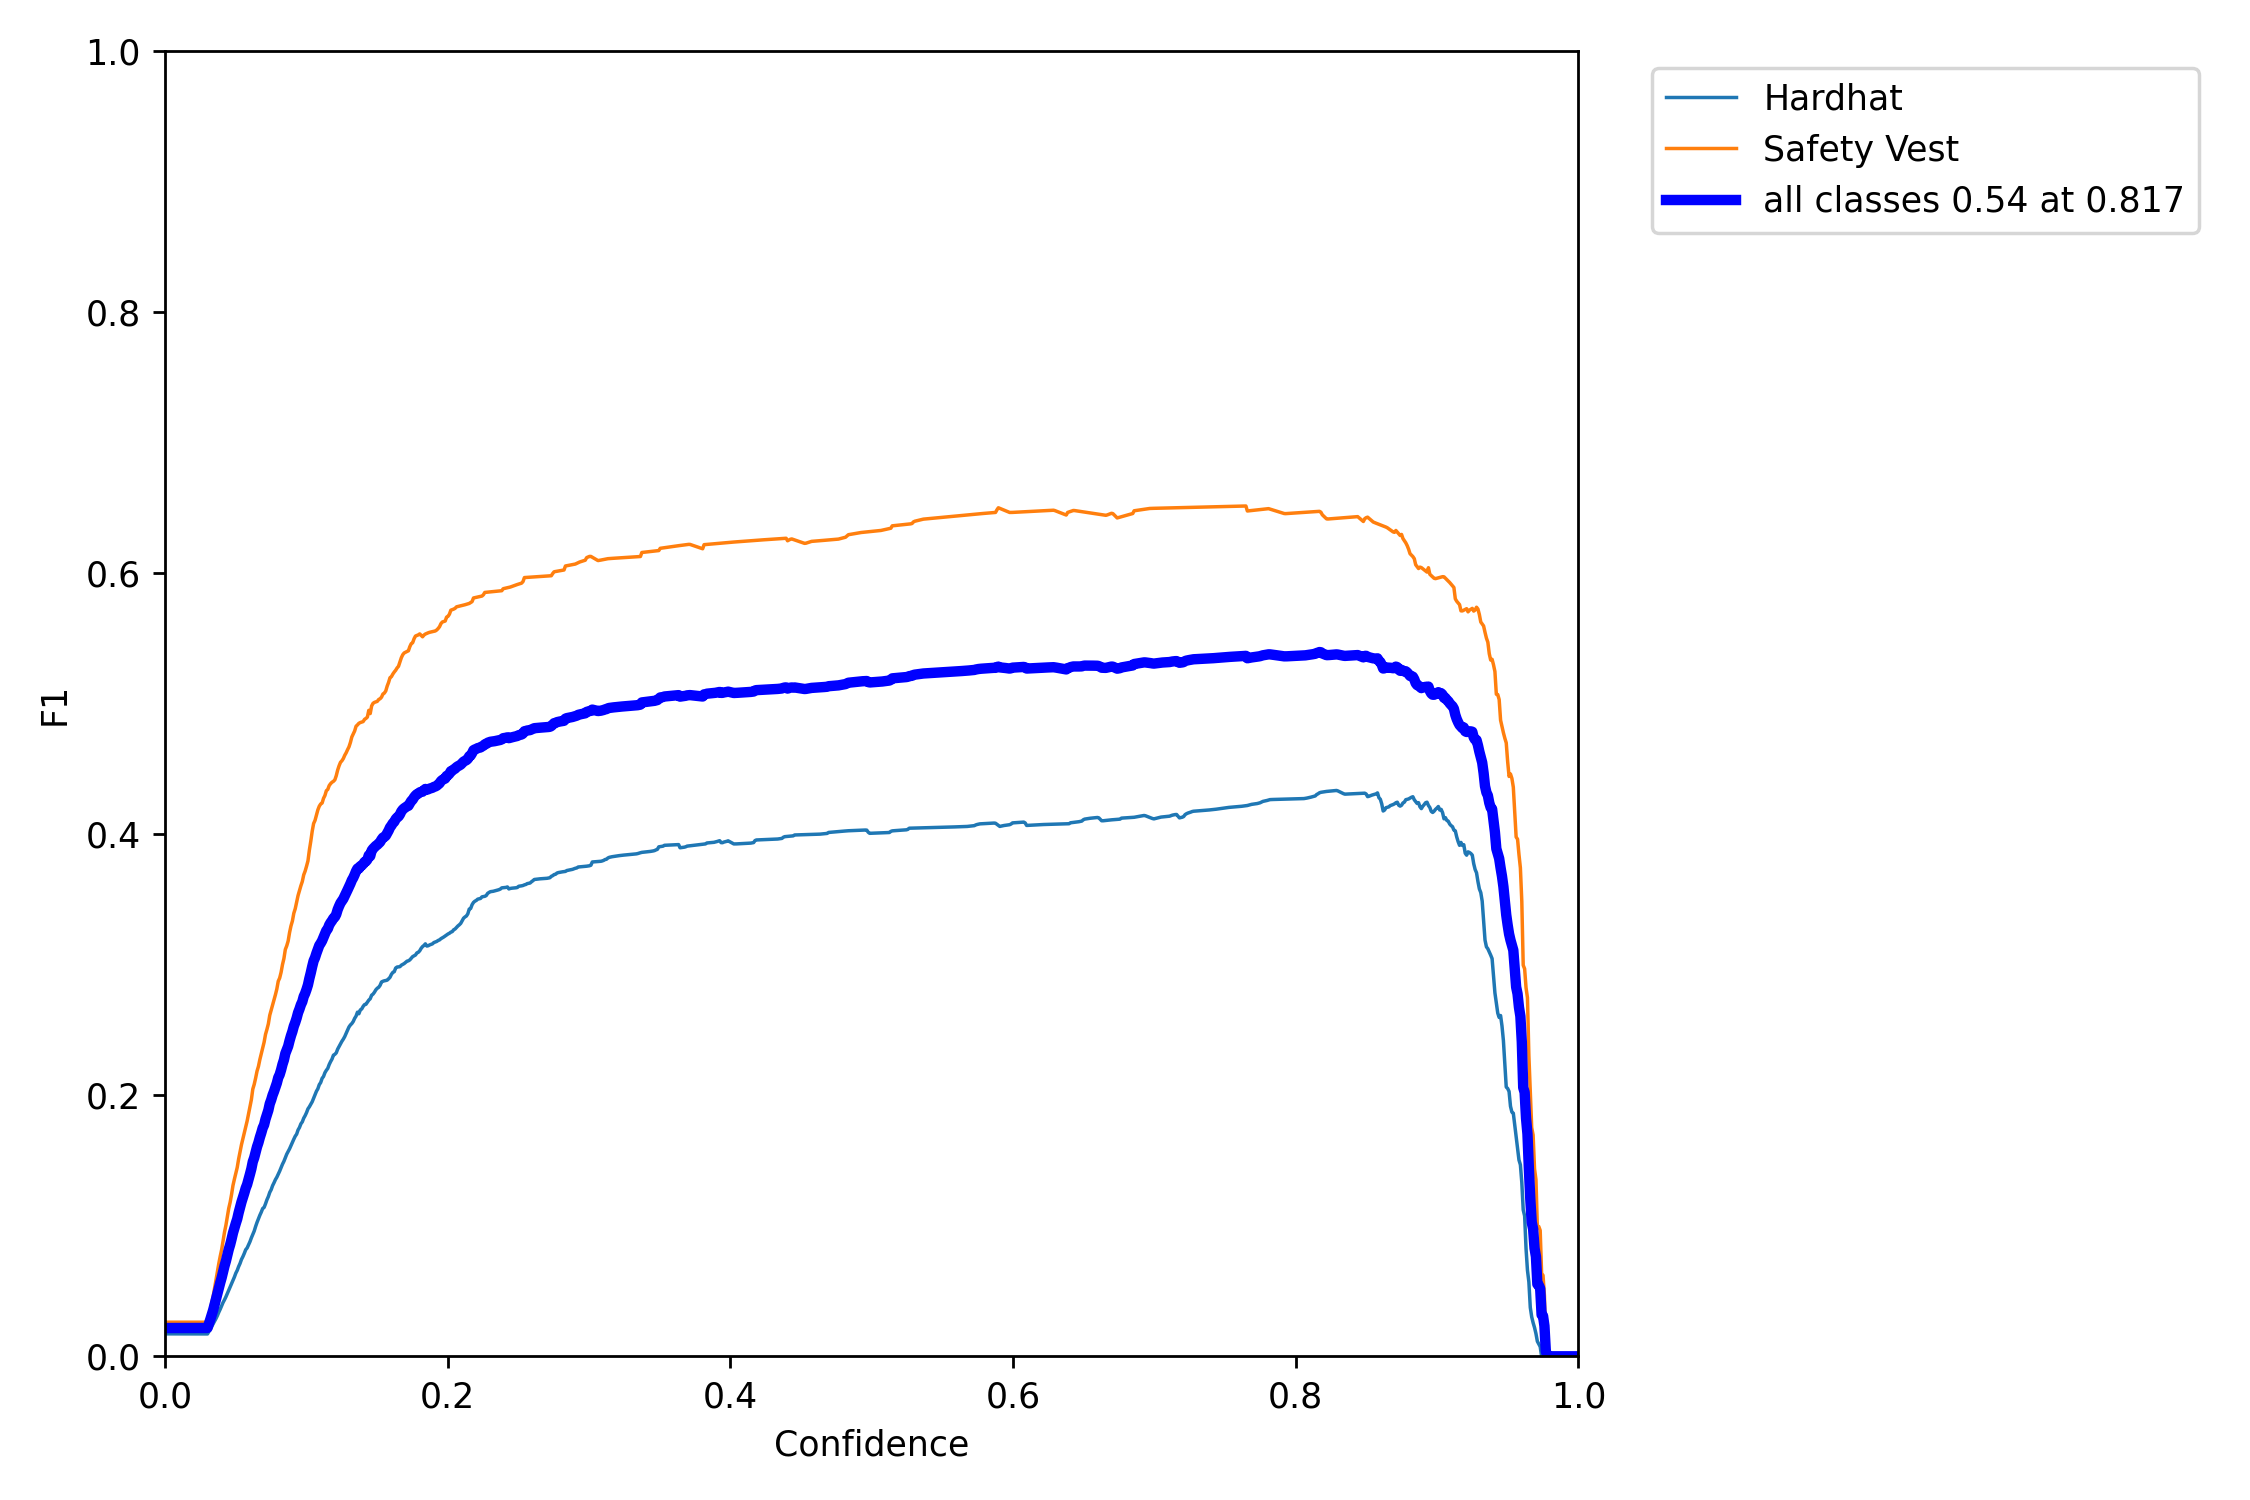

In [ ]:
Image(filename='/content/YOLOv6/runs/val/exp1/F1_curve.png', width=750)

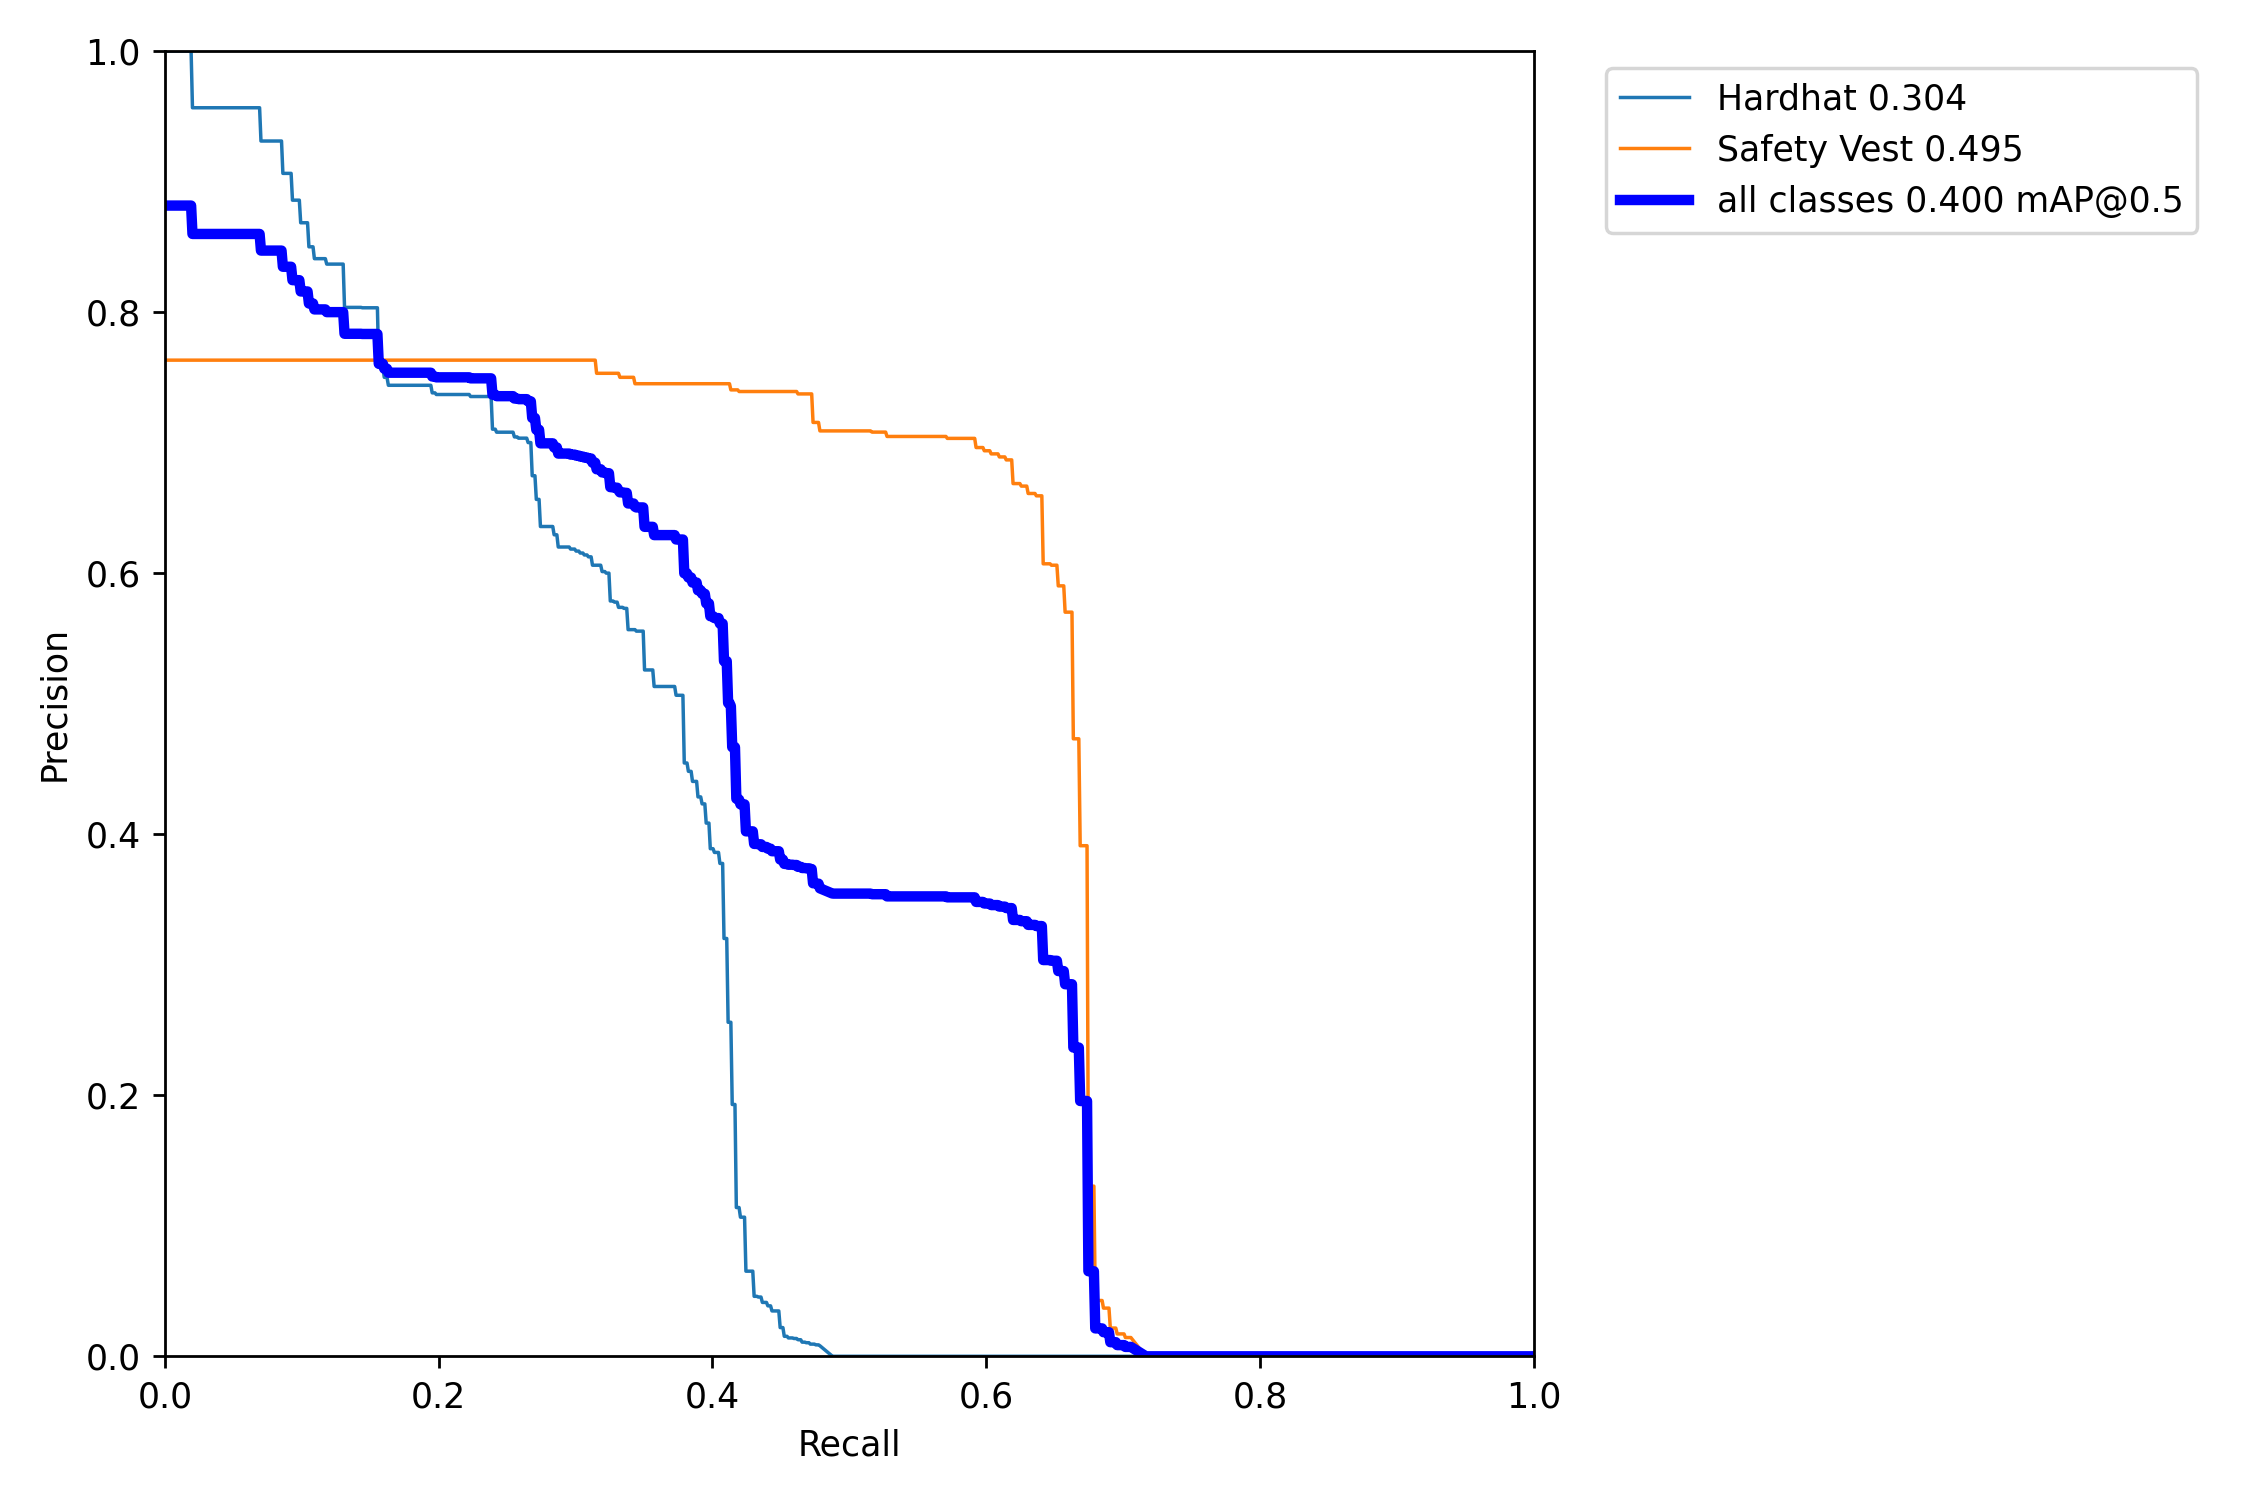

In [ ]:
Image(filename='/content/YOLOv6/runs/val/exp1/PR_curve.png', width=750)

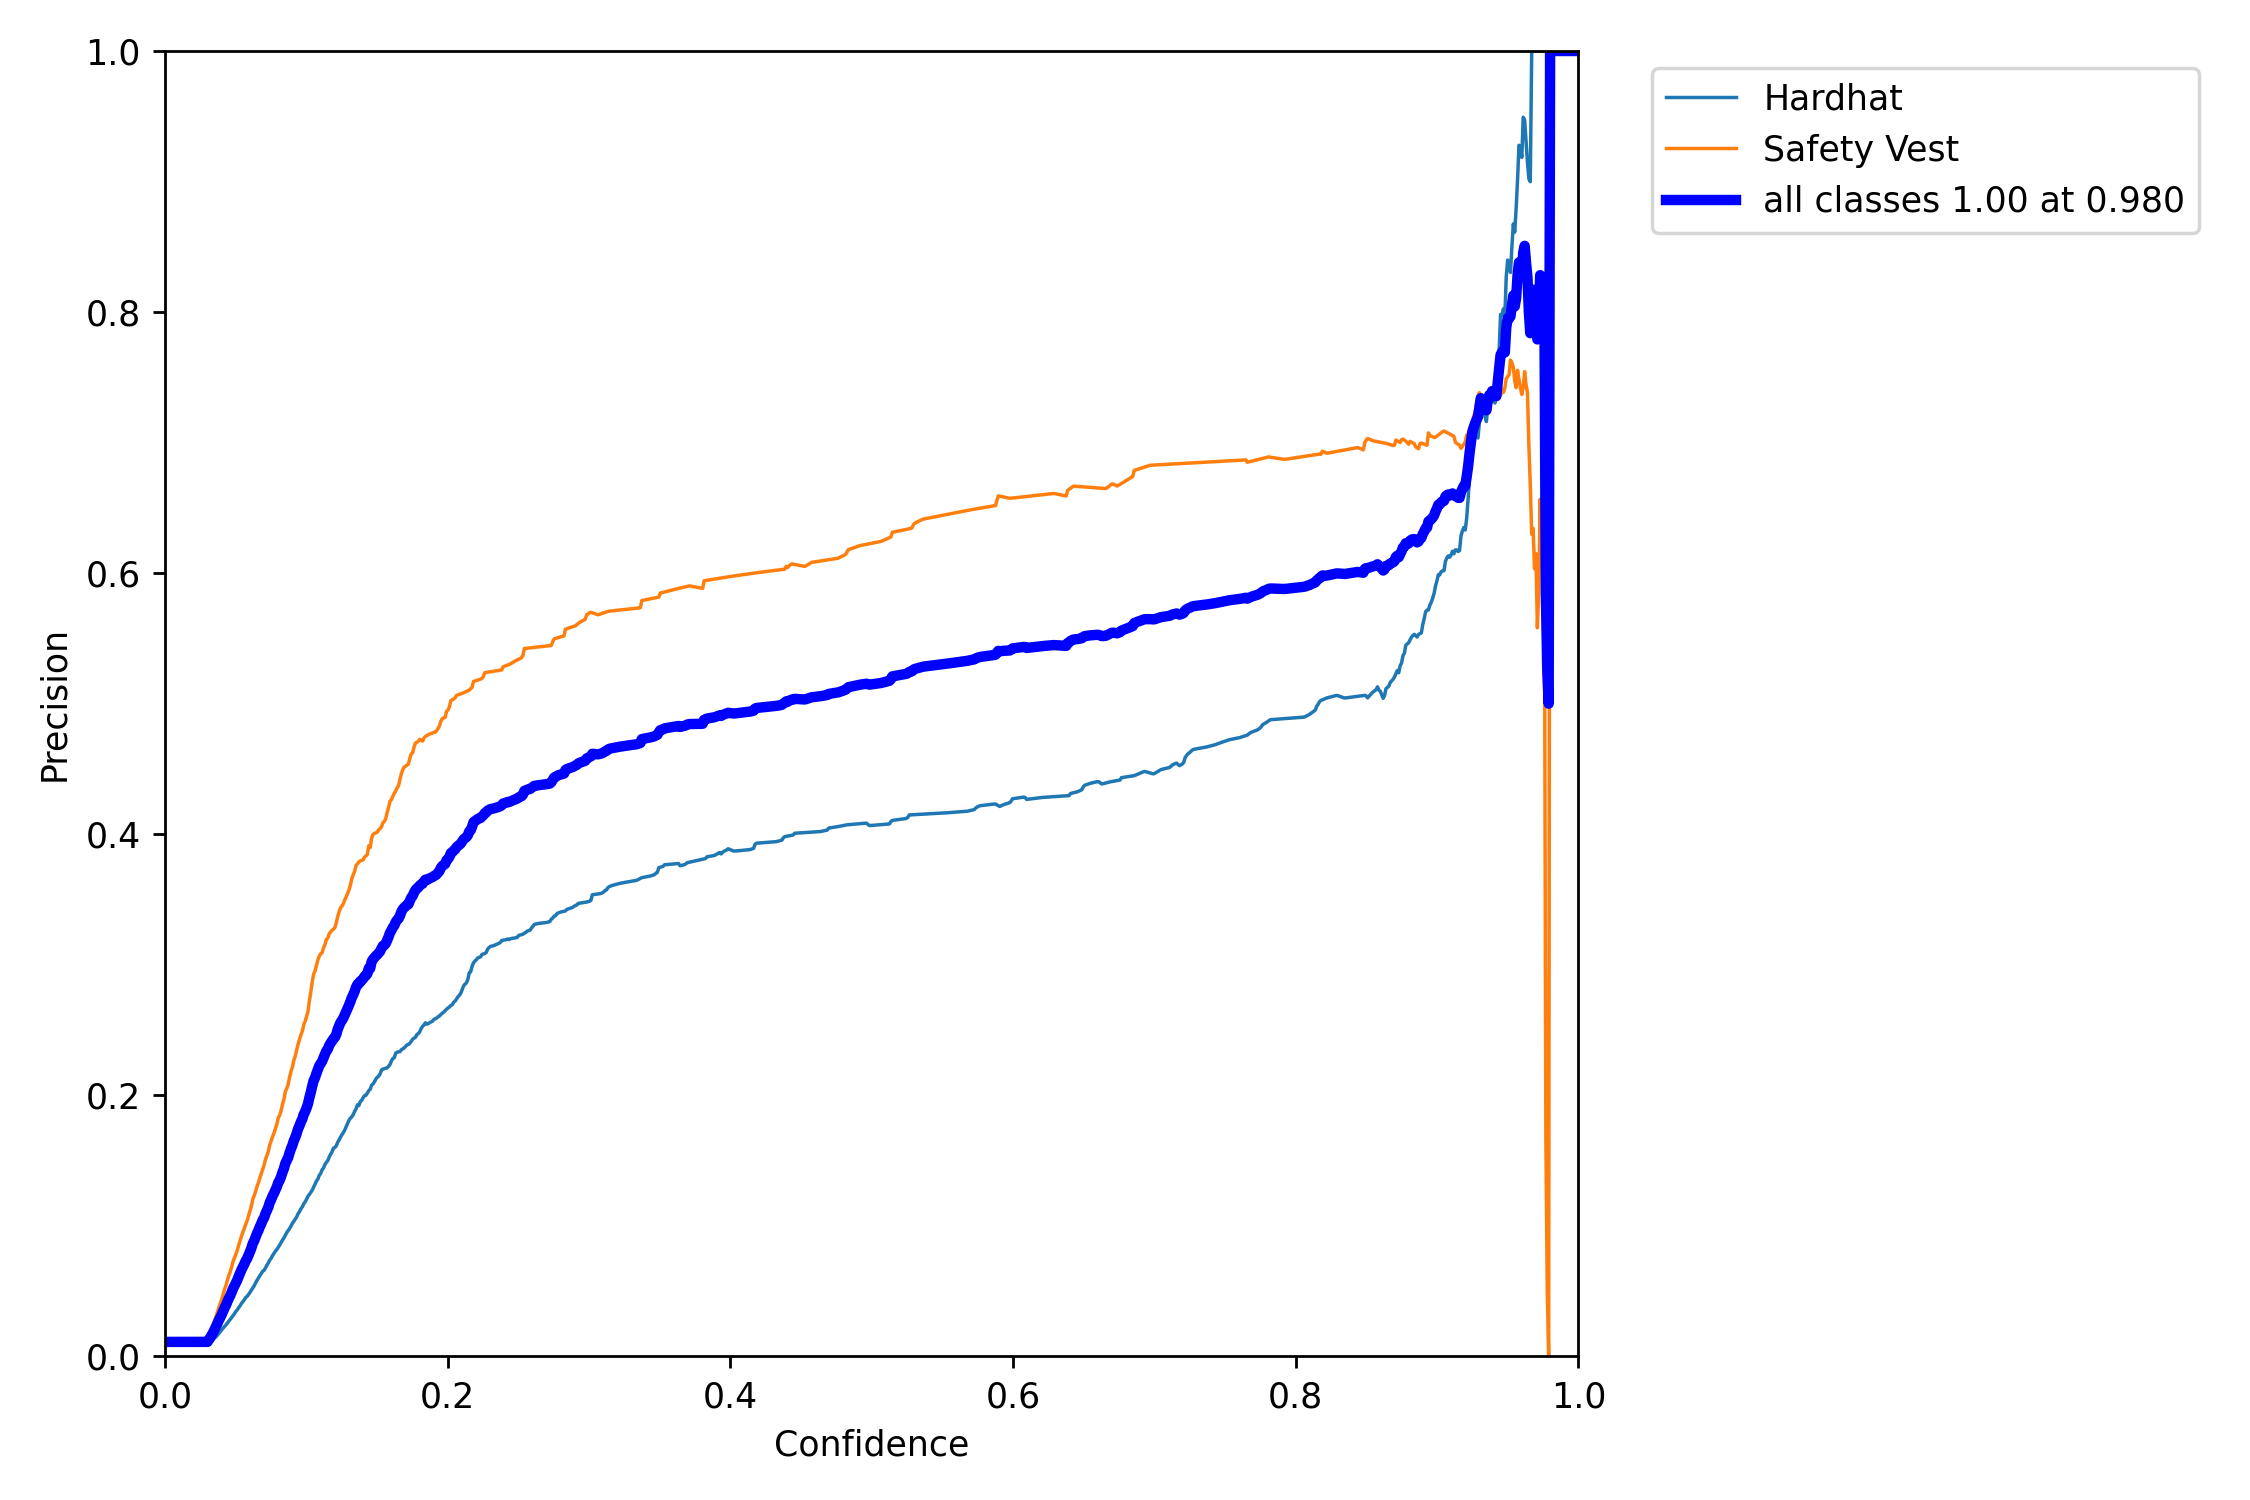

In [ ]:
Image(filename='/content/YOLOv6/runs/val/exp1/P_curve.png', width=750)

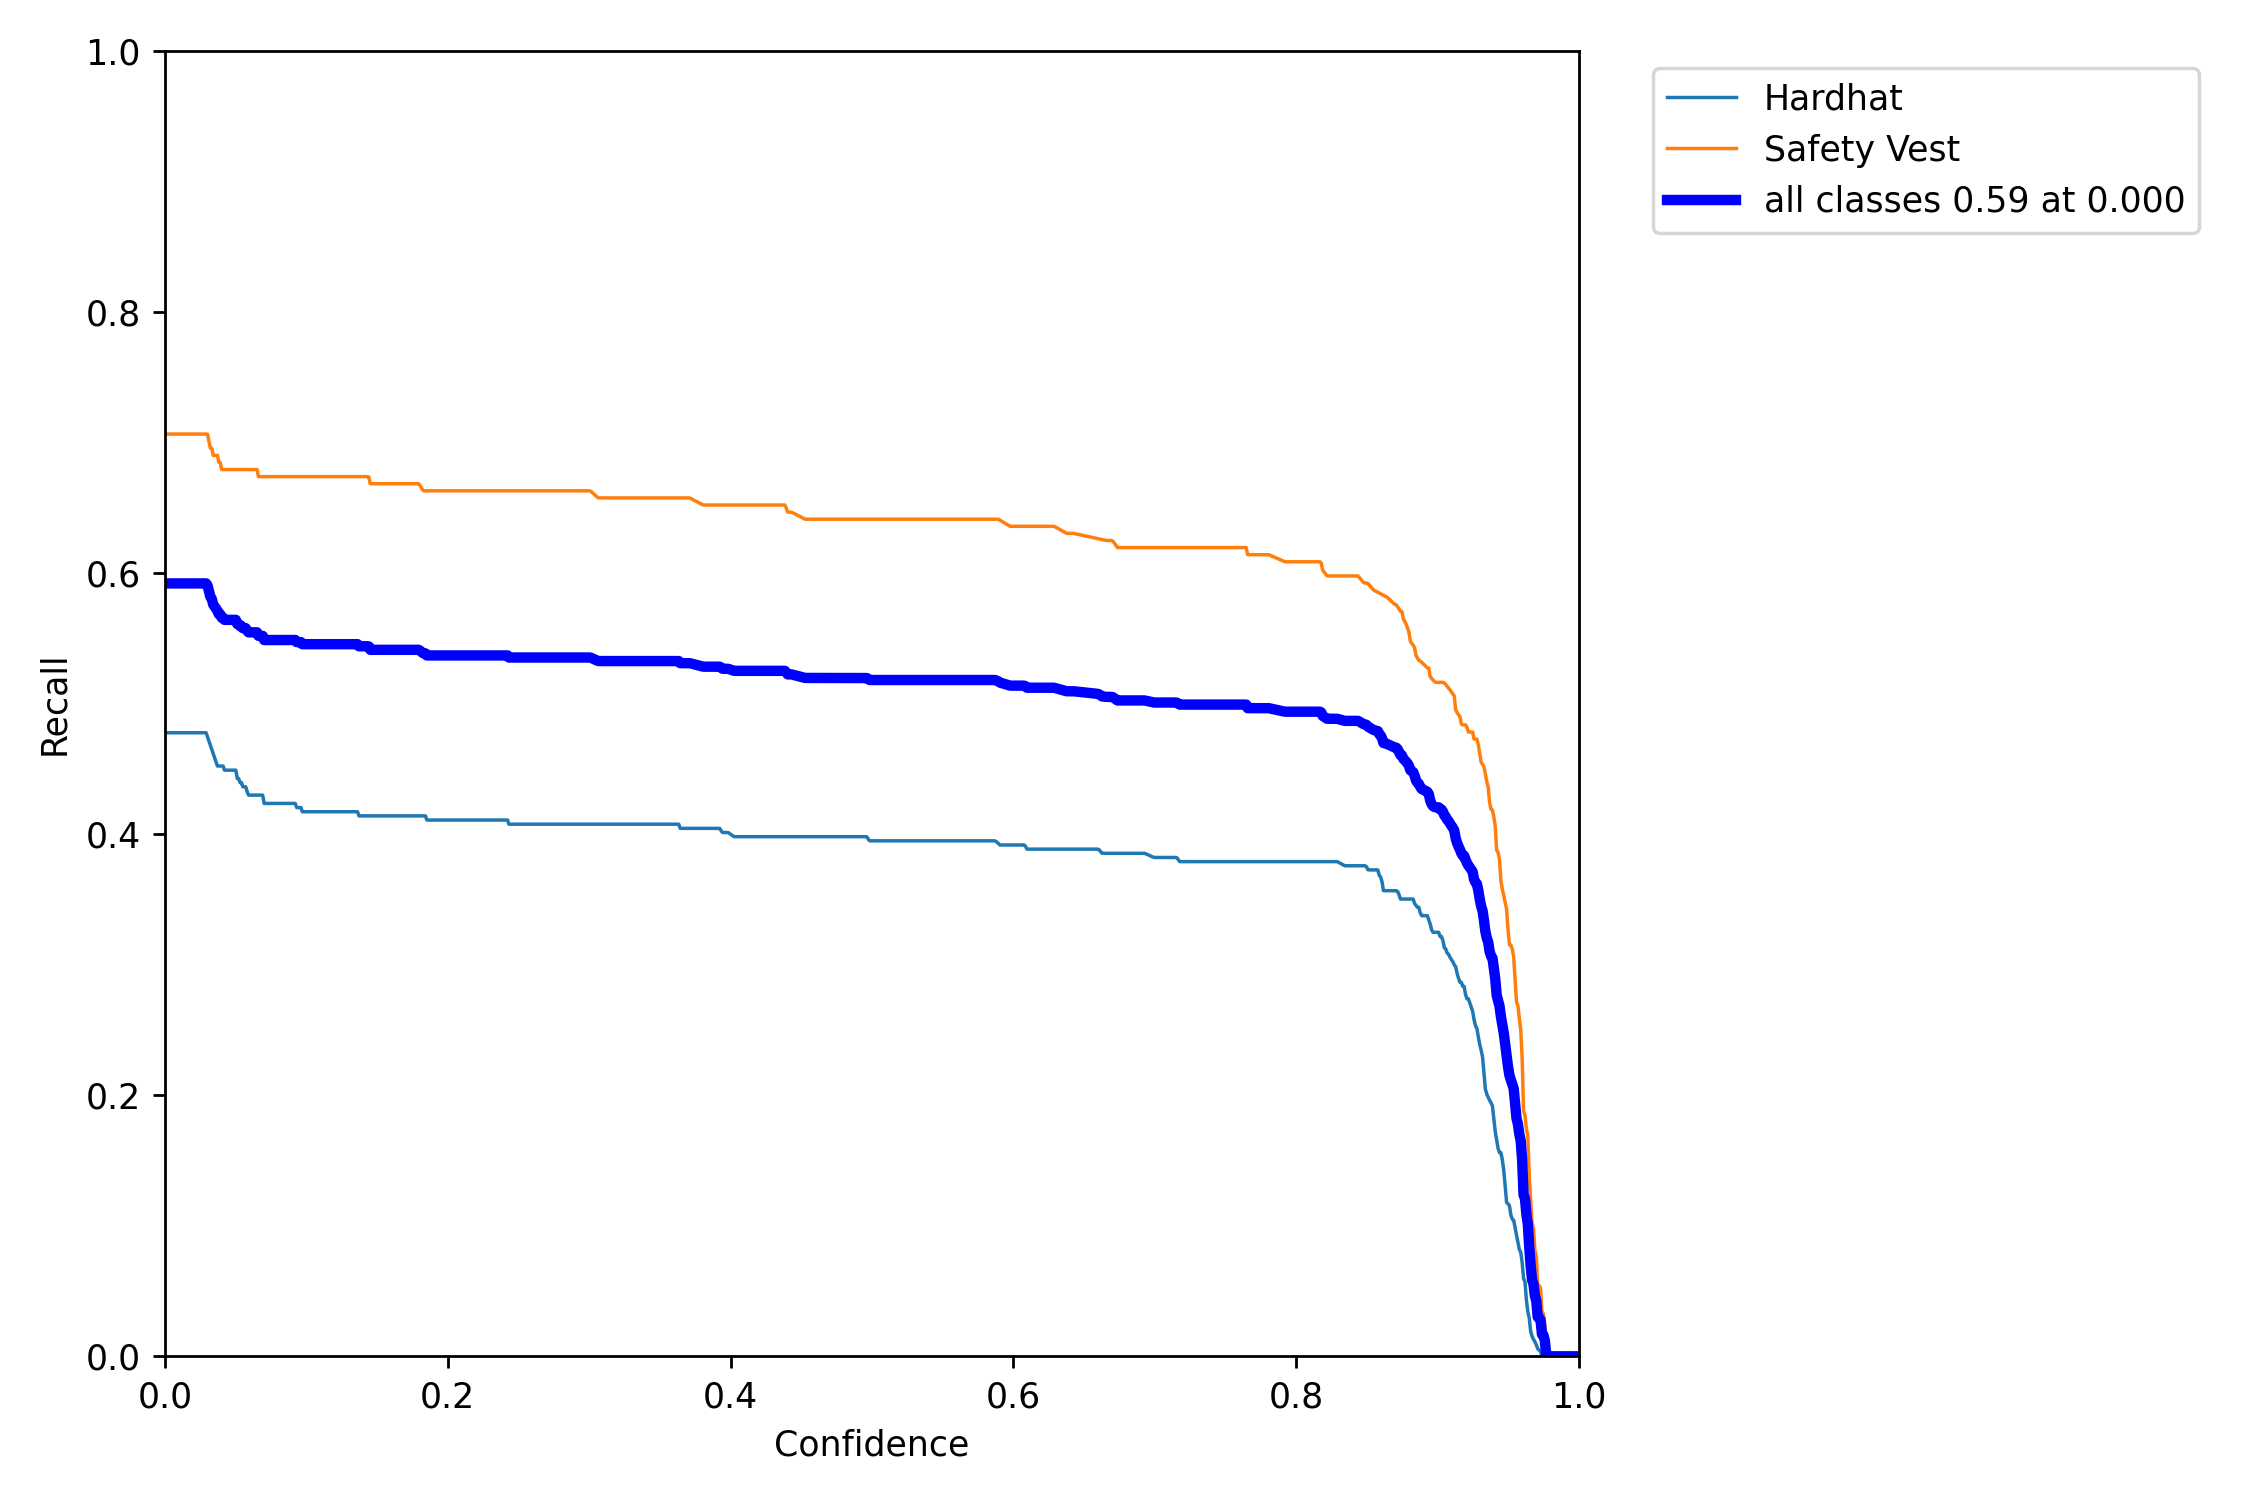

In [ ]:
Image(filename='/content/YOLOv6/runs/val/exp1/R_curve.png', width=750)

## Inference

In [ ]:
! python tools/infer.py --weights runs/train/exp1/weights/best_ckpt.pt --source custom_data/inference.jpeg --yaml custom_data/custom_dataset.yaml --device 0

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, max_det=1000, name='exp', project='runs/inference', save_dir=None, save_img=True, save_txt=False, source='custom_data/inference.jpeg', view_img=False, weights='runs/train/exp1/weights/best_ckpt.pt', yaml='custom_data/custom_dataset.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp1/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
100% 1/1 [00:00<00:00, 25.78it/s]
Results saved to runs/inference/exp


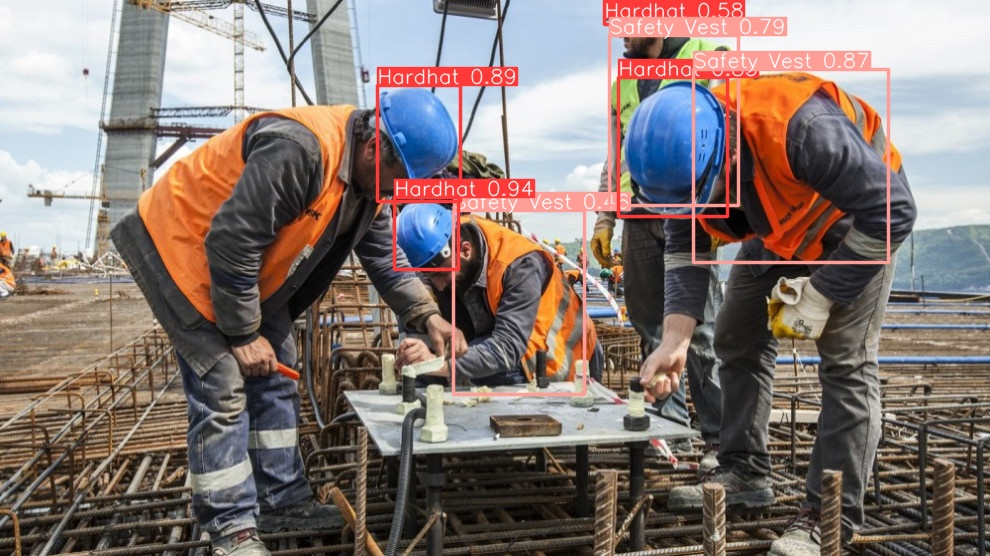

In [ ]:
Image(filename='/content/YOLOv6/runs/inference/exp/inference.jpeg', width=1000)

In [ ]:
! python tools/infer.py --weights runs/train/exp1/weights/best_ckpt.pt --source custom_data/managers.jpeg --yaml custom_data/custom_dataset.yaml --device 0

Namespace(agnostic_nms=False, classes=None, conf_thres=0.4, device='0', half=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, max_det=1000, name='exp', project='runs/inference', save_dir=None, save_img=True, save_txt=False, source='custom_data/managers.jpeg', view_img=False, weights='runs/train/exp1/weights/best_ckpt.pt', yaml='custom_data/custom_dataset.yaml')
Save directory already existed
Loading checkpoint from runs/train/exp1/weights/best_ckpt.pt

Fusing model...
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Switch model to deploy modality.
100% 1/1 [00:00<00:00,  7.90it/s]
Results saved to runs/inference/exp


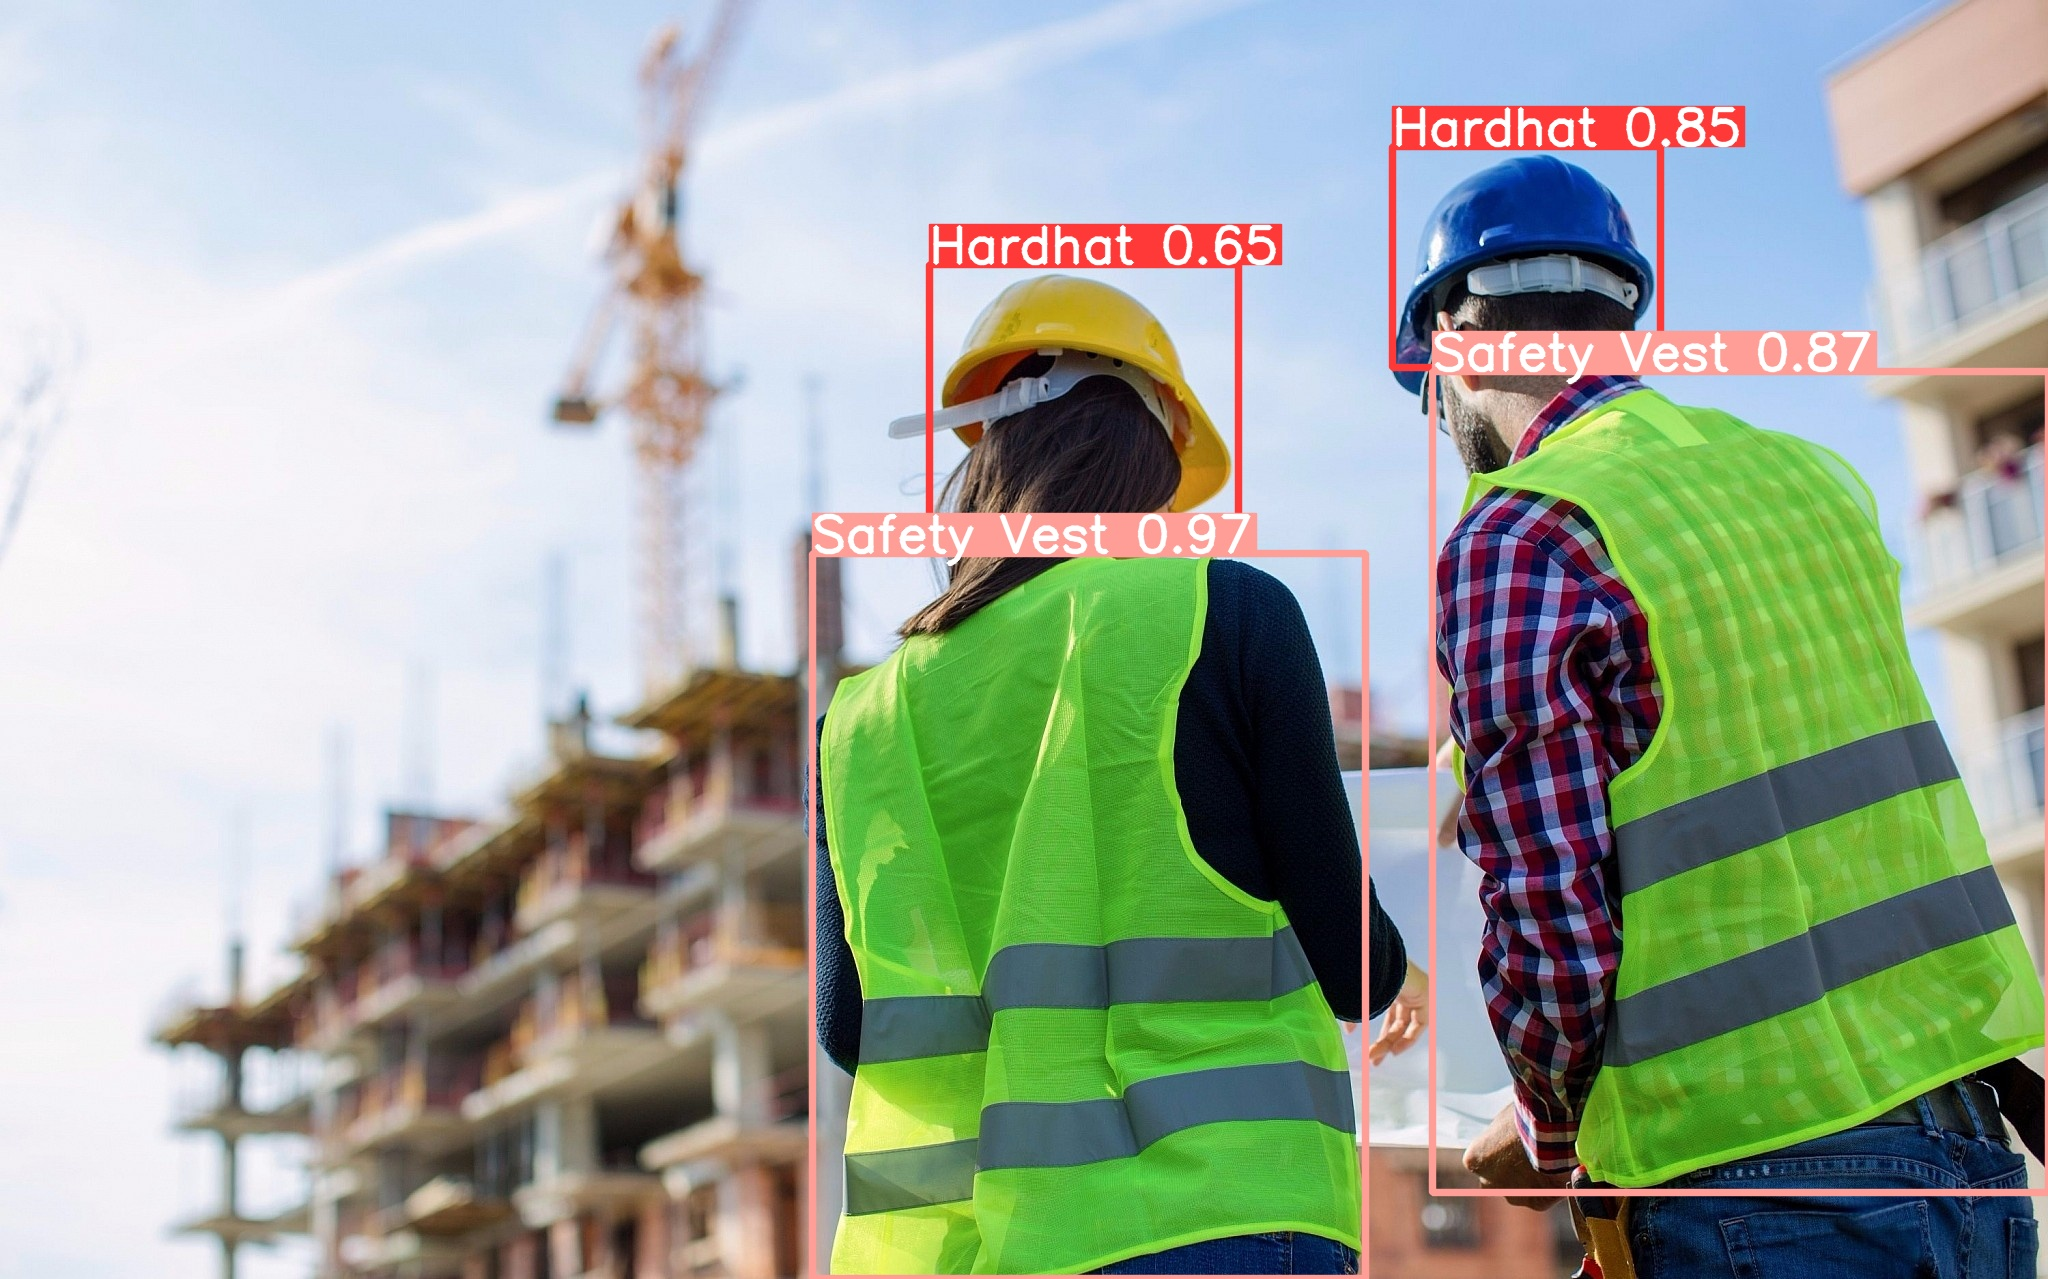

In [ ]:
Image(filename='/content/YOLOv6/runs/inference/exp/managers.jpeg', width=1000)